<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to Pandas Data Structures: Series</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 



In [2]:
ser = pd.Series([100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
ser

tom      100
bob      200
nancy    300
dan      400
eric     500
dtype: int64

In [4]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [5]:
ser[[4, 3, 1]]

eric    500
dan     400
bob     200
dtype: int64

In [6]:
ser['nancy']

300

In [7]:
'bob' in ser

True

In [8]:
ser * 2

tom       200
bob       400
nancy     600
dan       800
eric     1000
dtype: int64

In [9]:
ser ** 2

tom       10000
bob       40000
nancy     90000
dan      160000
eric     250000
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to Pandas Data Structures: DataFrames</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 



<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [10]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [11]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [12]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [13]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


In [14]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [15]:
df.columns

Index(['one', 'two'], dtype='object')

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [16]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [17]:
pd.DataFrame(data)

,alex,alice,dora,ema,joe
0,1.0,NaN,NaN,NaN,2.0
1,NaN,20.0,10.0,5.0,NaN


In [18]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,alice,dora,ema,joe
orange,1.0,NaN,NaN,NaN,2.0
red,NaN,20.0,10.0,5.0,NaN


In [19]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [20]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [21]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

In [22]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [23]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [24]:
three = df.pop('three')

In [25]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [26]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [27]:
del df['two']

In [28]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [29]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [30]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. Please note that it is already available in the folder for Week-4 so you don't need to download the dataset, but here are the links to the data source and location. 
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Let us look at the files in this dataset using the UNIX command ls.


In [31]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

README.txt	   genome-tags.csv  ml-20m.zip	ratings.csv
genome-scores.csv  links.csv	    movies.csv	tags.csv


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [32]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [34]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [35]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

## <h1 style="font-size:2em;color:#2467C0">Data Structures </h1><br><br><br><br><br>

<h1 style="font-size:1.5em;color:#2467C0">Series </h1>

In [36]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [37]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [38]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [39]:
row_0['userId']

18

In [40]:
'rating' in row_0

False

In [41]:
row_0.name

0

In [42]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [43]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [44]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [45]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
2000,910,68554,conspiracy theory


In [46]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

## <h1 style="font-size:2em;color:#2467C0">Statistics: Let us look how the ratings are distributed </h1><br><br><br><br><br>

In [47]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [48]:
ratings['rating'].mean()

3.5255285642993797

In [49]:
ratings['rating'].min()

0.5

In [50]:
ratings['rating'].max()

5.0

In [51]:
ratings['rating'].std()

1.0519889192942424

In [52]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [53]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [54]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [55]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

## <br><br><h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1><br><br><br><br><br>

In [56]:
movies.shape

(27278, 3)

In [57]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [58]:
ratings.shape

(20000263, 3)

In [59]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [60]:
tags.shape

(465564, 3)

In [61]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [62]:
tags = tags.dropna()

In [63]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [64]:
tags.shape

(465548, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

## <br><br><h1 style="font-size:2em;color:#2467C0">Data Visualization</h1><br><br><br><br><br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1b24ca1d0>]], dtype=object)

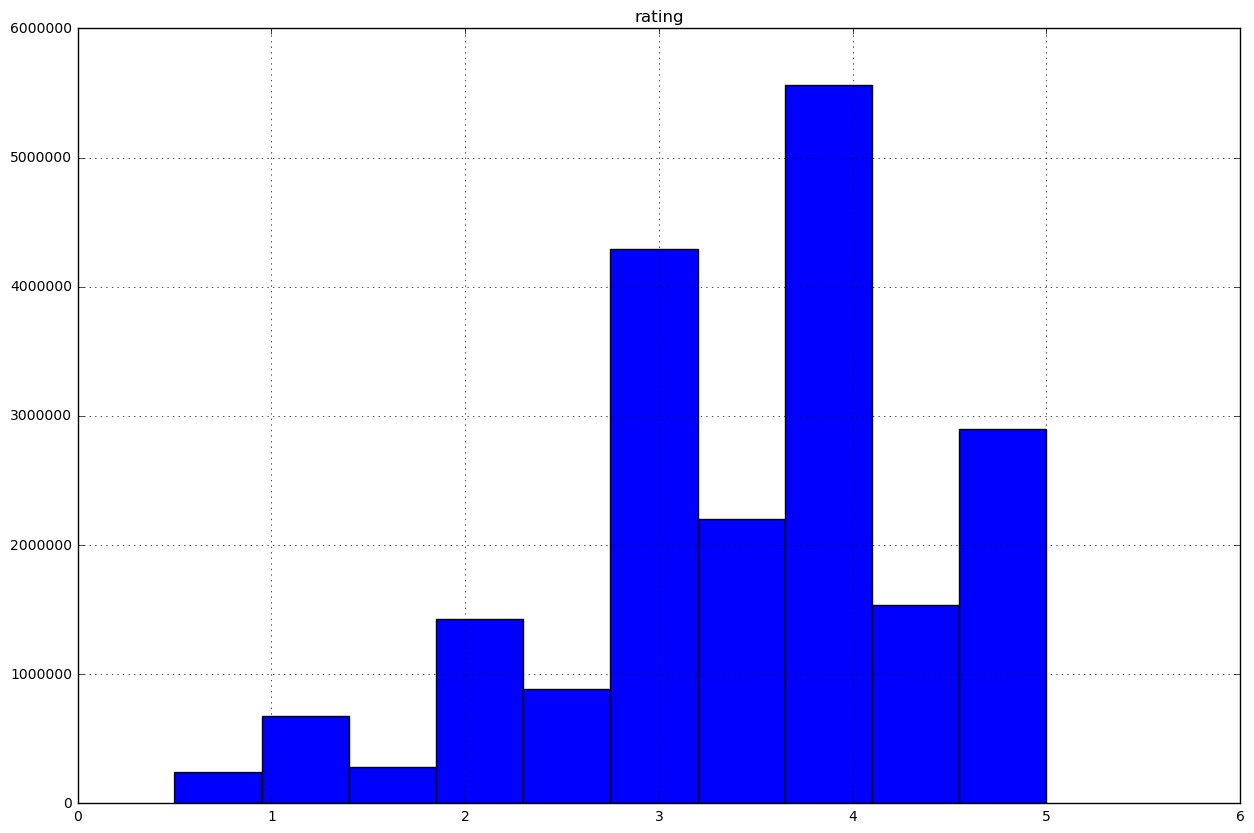

In [65]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

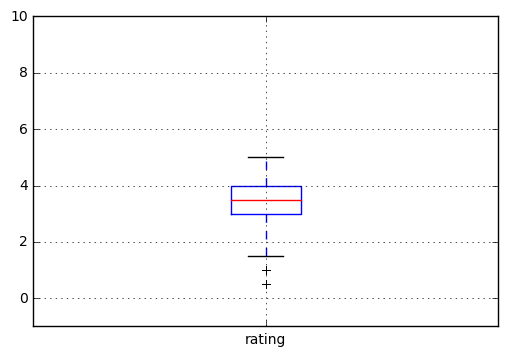

In [75]:
#Adjust y-axis label to go from -1 to 10
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim((-1, 10))

#Plot using Pandas boxplot() function
ratings.boxplot(column='rating', figsize=(15,20))

## <br><br><h1 style="font-size:2em;color:#2467C0">Slicing out columns</h1><br><br><br><br><br>
 

In [18]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [19]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [20]:
ratings[1000:1010]

,userId,movieId,rating
1000,11,527,4.5
1001,11,531,4.5
1002,11,541,4.5
1003,11,546,5.0
1004,11,551,5.0
1005,11,586,4.0
1006,11,587,4.5
1007,11,588,5.0
1008,11,589,4.5
1009,11,592,4.5


In [21]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

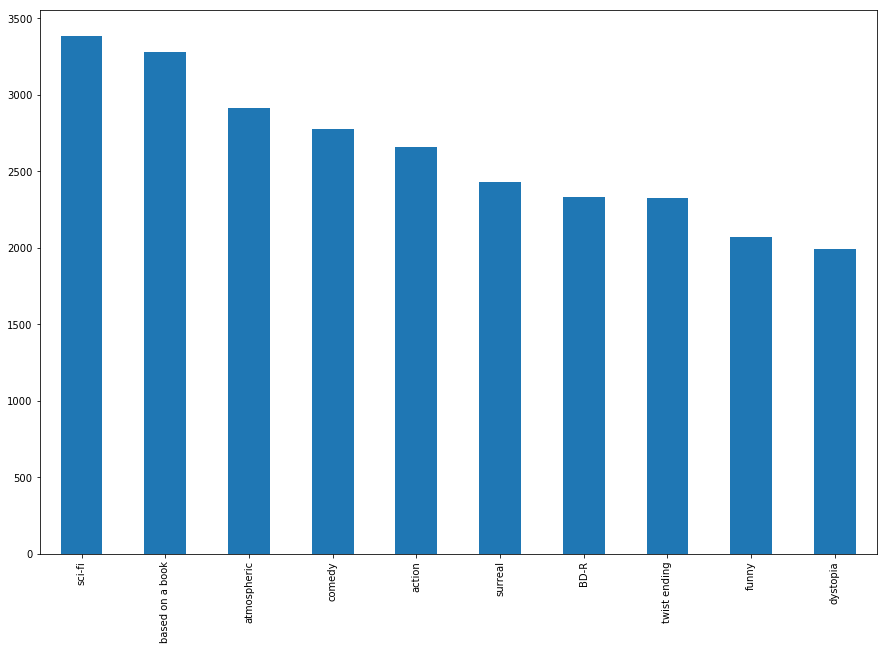

In [22]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

## <br><br><h1 style="font-size:2em;color:#2467C0">Filters for selecting rows</h1><br><br><br><br><br>


In [23]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [24]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][-5:]

,movieId,title,genres
27241,131132,Kleines Arschloch - Der Film (1997),Animation|Comedy
27247,131144,Werner - Das muss kesseln!!! (1996),Animation|Comedy
27248,131146,Werner - Volles Rooäää (1999),Animation|Comedy
27269,131243,Werner - Gekotzt wird später (2003),Animation|Comedy
27270,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy


## <br><br><h1 style="font-size:2em;color:#2467C0">Groupby/Aggregate </h1><br><br><br><br><br>

In [25]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [26]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.tail()

,rating
movieId,
131254,4.0
131256,4.0
131258,2.5
131260,3.0
131262,4.0


In [27]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


## <br><br><h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1><br><br><br><br><br>


In [28]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [29]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregation, merging, and filters to get useful analytics
</p>

In [31]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [32]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [33]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [34]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [35]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0


## <h1 style="font-size:2em;color:#2467C0"><br><br>Vectorized String Operations</h1><br><br><br>


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

In [36]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [37]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [38]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

You can also add a new column to detect each genre: e.g. isComedy <br><br>
This will be handy when creating features in your Machine Learning course
<br> </p>

In [39]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [40]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [41]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [42]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


## <br><br><h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1><br><br><br><br><br>


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Timestamps are common in sensor data or other time series datasets <br><br>
Let us revisit the tags.csv dataset and read the timestamps !
</p>

In [43]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [44]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [45]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [46]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [47]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [48]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [49]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [50]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


## <br><br><h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over time<br> - Are Movie ratings related to the year of launch? </h1><br><br><br><br><br>

In [51]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [52]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [53]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


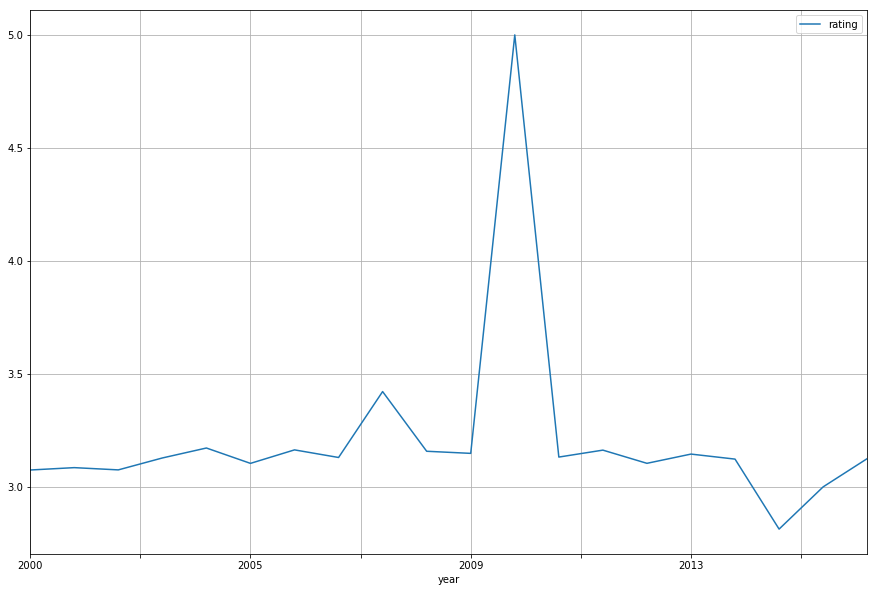

In [54]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>